# Exploratory Data Analysis 

#### Importing Necessary Libraries

In [61]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display_html
import os
import sys

sys.path.append(os.getcwd() + '/modules')

%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


#### Reading in the Dataset as CSV

In [62]:
raw_df = pd.read_csv('Data/winemag-data-130k-v2 copy.csv')

In [63]:
raw_df.shape

(129971, 14)

#### Dropping duplicates
The first instance of every duplicate will be kept in order to preserve as much data as possible.

In [64]:
nodup_df = raw_df.drop_duplicates(subset='title', keep='first')

In [65]:
nodup_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Dropping unnecessary rows
Since our projections of Points (Rating) will be based on Price, Province, Country and Variety. These were the chosen predictors because they are the most easily recognized, communicated and visualized. It keeps the audience from having unanswerable questions regarding how a specific rater's bias might play into prediction.  

In [66]:
nodup_df = nodup_df.drop(['Unnamed: 0', 'region_1', 'region_2', 'designation', 'description', 'taster_name', 'taster_twitter_handle', 'winery', 'title'], axis=1)

Gathering basic information about the new DataFrame

In [67]:
nodup_df.head()

,country,points,price,province,variety
0,Italy,87,NaN,Sicily & Sardinia,White Blend
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir


In [68]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118840 entries, 0 to 129970
Data columns (total 5 columns):
country     118781 non-null object
points      118840 non-null int64
price       110581 non-null float64
province    118781 non-null object
variety     118839 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ MB


Getting rid of null values

In [69]:
nodup_df = nodup_df.drop(nodup_df[nodup_df['country'].isna()].index)

In [70]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118781 entries, 0 to 129970
Data columns (total 5 columns):
country     118781 non-null object
points      118781 non-null int64
price       110526 non-null float64
province    118781 non-null object
variety     118780 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.4+ MB


In [71]:
nodup_df = nodup_df.drop(nodup_df[nodup_df['price'].isna()].index)

Now that null values are elimnated, we will check a breif overview of the final dataset and, later, parameters will be set to diregard outliers and reduce the skew of the dataset.

In [72]:
nodup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 1 to 129970
Data columns (total 5 columns):
country     110526 non-null object
points      110526 non-null int64
price       110526 non-null float64
province    110526 non-null object
variety     110525 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [73]:
nodup_df.head()

,country,points,price,province,variety
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir
5,Spain,87,15.0,Northern Spain,Tempranillo-Merlot


The mean price is 35.59. As you can see, the max price is nearly 100 times that, so using 3 standard deviations and basic logic of an affordable bottle of wine, we will cap the data at 200 dollars.

In [74]:
nodup_df.describe()

,points,price
count,110526.000000,110526.000000
mean,88.415803,35.592557
std,3.100570,41.904529
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [75]:
clean_df = nodup_df.drop(nodup_df[nodup_df['price'] >= 200].index)

After setting that parameter, we will check the data again to see if grouping can be done in order to shape the data to best fit general public's wine knowledge. 

In [76]:
clean_df.shape

(109784, 5)

In [77]:
clean_df.head()

,country,points,price,province,variety
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir
5,Spain,87,15.0,Northern Spain,Tempranillo-Merlot


Below, we see that we have 690 varitals. This creates a problem as we are attempting to keep our data focused on being presentable to those who do not have extensive knowledge. 

In [78]:
display(len(set(clean_df.country)))
display(len(set(clean_df.variety)))
display(len(set(clean_df.province)))

42

690

422

In [79]:
clean_df.describe()

,points,price
count,109784.000000,109784.000000
mean,88.376312,33.421236
std,3.065954,24.591280
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,199.000000


In [80]:
clean_df.head()

,country,points,price,province,variety
1,Portugal,87,15.0,Douro,Portuguese Red
2,US,87,14.0,Oregon,Pinot Gris
3,US,87,13.0,Michigan,Riesling
4,US,87,65.0,Oregon,Pinot Noir
5,Spain,87,15.0,Northern Spain,Tempranillo-Merlot


Here, we will group the dataframe by variety which appears at least 50 times. This number allows us to maintain the focus of the target audience, without sacrificing too much data. 

In [35]:
data = pd.DataFrame(clean_df).groupby('variety').filter(lambda x: len(x) >= 50)


In [36]:
data.shape

(105076, 5)

In [37]:
display(len(set(data.country)))
display(len(set(data.variety)))
display(len(set(data.province)))

41

119

384

In [38]:
cle

In [39]:
# plt.rcParams['figure.figsize']=20,10
# sns.distplot(data['price'], bins=500, color='darkmagenta')
# set_xlabel('price',fontsize=20)

# #plt.savefig('Images_Graphs/EDA_wine_price_distribution_post_clean.png', transparent=True, dpi=150, bbox_inches='tight')

In [40]:
# new_province = pd.DataFrame(data.province.value_counts())



In [41]:
# new_varietal = pd.DataFrame(data.variety.value_counts())
# new_varietal.nunique()

In [42]:
# new_country = pd.DataFrame(data.country.value_counts())

In [43]:
# barplot_dims = (20, 10)
# fig, ax = plt.subplots(figsize = barplot_dims)
# sns.barplot(x=new_province['province'].index, y=new_province['province'], ax=ax, color='darkmagenta')

# plt.title("Histogram of Wine Provinces")
# plt.ylabel("Number of Instances")
# plt.xlabel("Provinces")
# plt.xticks(rotation=90)
# plt.savefig('Images_Graphs/EDA_wine_provinces2.png', transparent=True, dpi=150, bbox_inches='tight')

In [44]:
# barplot_dims = (20, 10)
# fig, ax = plt.subplots(figsize = barplot_dims)
# sns.barplot(x=new_varietal['variety'].index, y=new_varietal['variety'], ax=ax, color='darkmagenta')

# plt.title("Histogram of Wine Provinces")
# plt.ylabel("Number of Instances")
# #plt.xlabel("Provinces")
# plt.xticks(rotation=90)
# plt.savefig('Images_Graphs/EDA_wine_varietals_postclean.png', transparent=True, dpi=150, bbox_inches='tight')

In [45]:
# barplot_dims = (20, 10)
# fig, ax = plt.subplots(figsize = barplot_dims)
# sns.barplot(x=new_country['country'].index, y=new_country['country'], ax=ax, color='darkmagenta')

# plt.title("Histogram of Wine Provinces")
# plt.ylabel("Number of Instances")
# #plt.xlabel("Provinces")
# plt.xticks(rotation=90)
# #plt.savefig('Images_Graphs/EDA_wine_provinces.png', transparent=True, dpi=150, bbox_inches='tight')

In [46]:
data.columns

Index(['country', 'points', 'price', 'province', 'variety'], dtype='object')

In [47]:
data.shape

(105076, 5)

In [48]:
y = data['points']

In [49]:
X, X_test, y_train, y_test = train_test_split(data, y, test_size= 0.20, random_state=42)

In [50]:
display(X.shape)
display(y_train.shape)
display(y_test.shape)
display(X_test.shape)

(84060, 5)

(84060,)

(21016,)

(21016, 5)

In [51]:
def prep_data_country(X, X_test, y_train, y_test):
    X = X.drop(['province', 'variety', 'price', 'points'], axis = 1)
    X_test = X_test.drop(['province', 'variety', 'price', 'points'], axis = 1)
    y1_train = y_train.astype(float)
    y1_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X1 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X1_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X1, X1_test, y1_train, y1_test

In [52]:
def prep_data_province(X, X_test, y_train, y_test):
    X = X.drop(['country', 'variety', 'price'], axis = 1)
    X_test = X_test.drop(['country', 'variety', 'price'], axis = 1)
    y2_train = y_train.astype(float)
    y2_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X2 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X2_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X2, X2_test, y2_train, y2_test

In [53]:
X

,country,points,price,province,variety
8297,US,92,35.0,California,Zinfandel
56055,US,88,18.0,California,Sauvignon Blanc
36602,US,92,50.0,California,Red Blend
122515,Austria,95,89.0,Wachau,Grüner Veltliner
63275,US,88,28.0,California,Pinot Gris
...,...,...,...,...,...
65179,US,88,25.0,California,Pinot Noir
92823,US,85,20.0,California,Sauvignon Blanc
128026,Italy,89,34.0,Tuscany,Red Blend
976,US,85,17.0,California,White Blend


In [54]:
def prep_data_variety(X, X_test, y_train, y_test):
    X = X.drop(['country', 'province', 'price'], axis = 1)
    X_test = X_test.drop(['country', 'province', 'price'], axis = 1)
    y3_train = y_train.astype(float)
    y3_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X3 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X3_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X3, X3_test, y3_train, y3_test


In [55]:
def prep_data_price(X, X_test, y_train, y_test):
    X = X.drop(['country', 'province', 'variety'], axis = 1)
    X_test = X_test.drop(['country', 'province', 'variety'], axis = 1)
    y4_train = y_train.astype(float)
    y4_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X4 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X4_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X4, X4_test, y4_train, y4_test


In [56]:
def prep_data_price_variety(X, X_test, y_train, y_test):
    X = X.drop(['province', 'country'], axis = 1)
    X_test = X_test.drop(['province', 'country'], axis = 1)
    y5_train = y_train.astype(float)
    y5_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X5 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X5_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X5, X5_test, y5_train, y5_test


In [57]:
def prep_data_price_country(X, X_test, y_train, y_test):
    X = X.drop(['province', 'variety'], axis = 1)
    X_test = X_test.drop(['province', 'variety'], axis = 1)
    y6_train = y_train.astype(float)
    y6_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X6 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X6_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X6, X6_test, y6_train, y6_test


In [58]:
def prep_data_price_province(X, X_test, y_train, y_test):
    X = X.drop(['country', 'variety'], axis = 1)
    X_test = X_test.drop(['country', 'variety'], axis = 1)
    y7_train = y_train.astype(float)
    y7_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X7 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X7_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X7, X7_test, y7_train, y7_test


In [59]:
def prep_data_price_province_variety(X, X_test, y_train, y_test):
    X = X.drop(['country'], axis = 1)
    X_test = X_test.drop(['country'], axis = 1)
    y8_train = y_train.astype(float)
    y8_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X8 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X8_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X8, X8_test, y8_train, y8_test


In [60]:
def prep_data_price_country_variety(X, X_test, y_train, y_test):
    X = X.drop(['province'], axis = 1)
    X_test = X_test.drop(['province'], axis = 1)
    y9_train = y_train.astype(float)
    y9_test = y_test.astype(float)
    categorical_variables = X.select_dtypes(include=['object']).columns
    numerical_variables = X.select_dtypes(include = ['int64', 'float64']).columns
    X_test_cat_var = X_test.select_dtypes(include=['object']).columns
    X_test_num_var = X_test.select_dtypes(include = ['int64', 'float64']).columns
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_categ = ohe.fit_transform(X[categorical_variables], ).toarray()
    X_num = X[numerical_variables].values
    X9 = np.concatenate((X_categ, X_num), axis=1)
    X_test_categ = ohe.transform(X_test[X_test_cat_var]).toarray()
    X_test_num = X_test[X_test_num_var].values
    X9_test = np.concatenate((X_test_categ, X_test_num), axis=1)
    return X9, X9_test, y9_train, y9_test


In [59]:
X1, X1_test, y1_train, y1_test = prep_data_country(X, X_test, y_train, y_test)

In [60]:
X2, X2_test, y2_train, y2_test = prep_data_province(X, X_test, y_train, y_test);

In [61]:
X2

array([[ 0.,  0.,  0., ...,  0.,  0., 92.],
       [ 0.,  0.,  0., ...,  0.,  0., 88.],
       [ 0.,  0.,  0., ...,  0.,  0., 92.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 89.],
       [ 0.,  0.,  0., ...,  0.,  0., 85.],
       [ 0.,  0.,  0., ...,  0.,  0., 90.]])

In [62]:
X3, X3_test, y3_train, y3_test = prep_data_variety(X, X_test, y_train, y_test);

In [63]:
X3

array([[ 0.,  0.,  0., ...,  1.,  0., 92.],
       [ 0.,  0.,  0., ...,  0.,  0., 88.],
       [ 0.,  0.,  0., ...,  0.,  0., 92.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 89.],
       [ 0.,  0.,  0., ...,  0.,  0., 85.],
       [ 0.,  0.,  0., ...,  0.,  0., 90.]])

In [64]:
X4, X4_test, y4_train, y4_test = prep_data_price(X, X_test, y_train, y_test);

In [65]:
X4

array([[92., 35.],
       [88., 18.],
       [92., 50.],
       ...,
       [89., 34.],
       [85., 17.],
       [90., 80.]])

In [66]:
X5, X5_test, y5_train, y5_test = prep_data_price_variety(X, X_test, y_train, y_test);

In [67]:
X6, X6_test, y6_train, y6_test = prep_data_price_country(X, X_test, y_train, y_test);

In [68]:
X7, X7_test, y7_train, y7_test = prep_data_price_province(X, X_test, y_train, y_test);

In [69]:
X8, X8_test, y8_train, y8_test = prep_data_price_province_variety(X, X_test, y_train, y_test);

In [70]:
X9, X9_test, y9_train, y9_test = prep_data_price_country_variety(X, X_test, y_train, y_test);

In [71]:
def try_linear_models(X, X_test, y_train, y_test):
    model = linear_model.Ridge(alpha = 0.1).fit(X, y_train)
    predictions = model.predict(X_test)
    return predictions

In [72]:
def error_metrics(predictions, y_test):
    # The mean squared error
    print("--Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    # Explained variance score: 1 is perfect prediction
    print('--Variance score: %.2f' % r2_score(y_test, predictions))

In [73]:
def inspect_df(predictions, y_test):
    true_vs_pred = np.vstack((predictions, y_test))
    true_df = pd.DataFrame(true_vs_pred)
    true_df = true_df.transpose()
    true_df.columns = ["Predicted", "Actual"]
    return true_df.head()

MODELING FINALLY!

In [74]:
model_1_pred = try_linear_models(X1, X1_test, y1_train, y1_test)

In [75]:
error_metrics(model_1_pred, y1_test)

--Mean squared error: 8.98
--Variance score: 0.05


In [76]:
country_vs_points = inspect_df(model_1_pred, y1_test)
country_vs_points.head()

,Predicted,Actual
0,88.640679,92.0
1,88.557062,88.0
2,88.640679,84.0
3,87.270881,84.0
4,87.856816,86.0


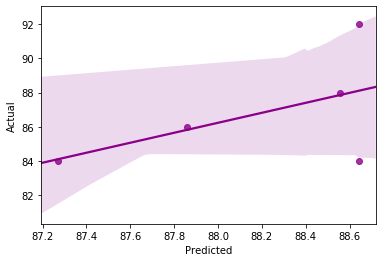

In [77]:
sns.regplot(x='Predicted', y='Actual', data=country_vs_points, color='darkmagenta')

In [ ]:
X2

In [ ]:
model_2_pred = try_linear_models(X2, X2_test, y2_train, y2_test);

In [ ]:
model_2_pred

In [ ]:
error_metrics(model_2_pred, y2_test)

In [ ]:
province_vs_points = inspect_df(model_2_pred, y2_test)
province_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=province_vs_points, color='darkmagenta')

In [ ]:
X3, X3_test, y3_train, y3_test = prep_data_variety(X, X_test, y_train, y_test);

In [ ]:
model_3_pred = try_linear_models(X3, X3_test, y3_train, y3_test);

In [ ]:
model_3_pred

In [ ]:
error_metrics(model_3_pred, y3_test)

In [ ]:
variety_vs_points = inspect_df(model_3_pred, y3_test)
variety_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=variety_vs_points, color='darkmagenta')

In [ ]:
X4, X4_test, y4_train, y4_test = prep_data_price(X, X_test, y_train, y_test);

In [ ]:
model_4_pred = try_linear_models(X4, X4_test, y4_train, y4_test);

In [ ]:
error_metrics(model_4_pred, y4_test)

In [ ]:
price_vs_points = inspect_df(model_2_pred, y2_test)
price_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=price_vs_points, color='darkmagenta')

In [ ]:
X5, X5_test, y5_train, y5_test = prep_data_price_variety(X, X_test, y_train, y_test);

In [ ]:
model_5_pred = try_linear_models(X5, X5_test, y5_train, y5_test);

In [ ]:
error_metrics(model_5_pred, y5_test)

In [ ]:
price_variety_vs_points = inspect_df(model_2_pred, y2_test)
price_variety_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=price_variety_vs_points, color='darkmagenta')

In [ ]:
X6, X6_test, y6_train, y6_test = prep_data_price_country(X, X_test, y_train, y_test);

In [ ]:
model_6_pred = try_linear_models(X6, X6_test, y6_train, y6_test);

In [ ]:
error_metrics(model_6_pred, y6_test)

In [ ]:
price_country_vs_points = inspect_df(model_2_pred, y2_test)
price_country_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=price_country_vs_points, color='darkmagenta')

In [ ]:
X7, X7_test, y7_train, y7_test = prep_data_price_province(X, X_test, y_train, y_test);

In [ ]:
model_7_pred = try_linear_models(X7, X7_test, y7_train, y7_test);

In [ ]:
error_metrics(model_7_pred, y7_test)

In [ ]:
price_province_vs_points = inspect_df(model_7_pred, y7_test)
price_province_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=price_province_vs_points, color='darkmagenta')

In [ ]:
X8, X8_test, y8_train, y8_test = prep_data_price_province_variety(X, X_test, y_train, y_test);

In [ ]:
model_8_pred = try_linear_models(X8, X8_test, y8_train, y8_test);

In [ ]:
error_metrics(model_8_pred, y8_test)

In [ ]:
price_province_variety_vs_points = inspect_df(model_8_pred, y8_test)
price_province_variety_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=price_province_variety_vs_points, color='darkmagenta')

In [ ]:
X9, X9_test, y9_train, y9_test = prep_data_price_country_variety(X, X_test, y_train, y_test);

In [ ]:
model_9_pred = try_linear_models(X9, X9_test, y9_train, y9_test);

In [ ]:
error_metrics(model_9_pred, y9_test)

In [ ]:
price_country_variety_vs_points = inspect_df(model_9_pred, y9_test)
price_country_variety_vs_points.head()

In [ ]:
sns.regplot(x='Predicted', y='Actual', data=price_country_variety_vs_points, color='darkmagenta')

In [ ]:
sns.set(style="darkgrid")

g = sns.jointplot("points", "price", data=data, kind="reg",
                  xlim=(80, 100), ylim=(0, 200), color="darkmagenta", height=7)
plt.savefig('Images_Graphs/price_vs_points3.png', transparent=True, dpi=150, bbox_inches='tight')

In [ ]:
plt.savefig('Images_Graphs/price_vs_points.png', transparent=True, dpi=150, bbox_inches='tight')

In [ ]:
data['country']